## Load Log Files

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from load_logs import *
from evaluation import *
from features import *
from visualize import *

In [3]:
directory = "./Logs/"
save_path = "./Saved/"

### Reload Log Files

In [4]:
logs, log_labels = read_logs_and_labels("./Saved/logs.txt", "./Saved/labels.txt")

In [5]:
import pandas as pd
import numpy as np
import re
import os
import pickle
import sys
import random

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [6]:
n_clusters = 10

## Evaluate the Count Vectorizer Parameter

In [7]:
min_df_vals = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
n_val = 10

In [8]:
def features_param_metrics(logs, gram):
    vms = []
    fms = []
    for i in range(n_val):
        vmn = []
        fmn = []
        
        random_val = random.randint(1, 45)
        for min_df_val in min_df_vals:
            labels_ = log_labels
            
            X = get_features(logs, gram, min_df_val)
            X = X.toarray()
    
            idxs = np.where(np.all(X == 0, axis=1))

            X = np.delete(X, idxs, axis=0)
            labels_ = np.delete(labels_, idxs)

            kmeans = KMeans(init="k-means++", n_clusters=n_clusters, random_state=random_val).fit(X)
            labels = kmeans.labels_

            vm = evaluate_vmeasure(labels_, labels)
            vmn.append(vm)
            
            fm = evaluate_fm(labels_, labels)
            fmn.append(fm)
        
        vmn.append(random_val)
        fmn.append(random_val)
        
        vms.append(vmn)
        fms.append(fmn)
        
    return vms, fms
    
        

In [9]:
def find_best_param(vms, fms):
    vsums = np.sum(vms, axis=0)
    fsums = np.sum(fms, axis=0)
    
    print(np.argmin(np.std(vms, axis=0)))
    print(np.argmin(np.std(fms, axis=0)))
    
    return np.argmax(vsums/n_val), np.argmax(fsums/n_val)

In [10]:
def plot_features_performance(metrics, title):
    sns.set(style='white', context='poster', rc={'figure.figsize':(14,8)})
    plt.figure(0).clf()
    plt.title(title)
    i=0
    for mm in metrics:
        plt.plot(min_df_vals, mm, label=str(i))
        i+=1

        plt.legend(loc=0)


In [11]:
vms, fms = features_param_metrics(logs, 2)

In [12]:
header = min_df_vals[:] 
header.extend(["Seed"])

tab_results(header, vms)

+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|          10         |          20         |          30         |          40         |          50         |          60         |          70         |          80         |          90         |         100         | Seed |
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
| 0.23457522123634664 |  0.2111098132379509 | 0.21915132494149328 | 0.19677843201829115 | 0.21177298736412853 |  0.2642079147921586 |  0.2833321014695195 | 0.23861907586088382 |  0.2440386810341405 | 0.24917303861257947 |  38  |
| 0.28210416310562964 | 0.20034983036956283 |  0.2232435733057852 |  0.2314797144120

In [13]:
tab_results(header, fms)

+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|          10         |          20         |          30         |          40         |          50         |          60         |          70         |          80         |          90         |         100         | Seed |
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|  0.3213726496457563 | 0.34349678254465427 | 0.32997119675158826 | 0.31825942770945287 |  0.3383183903323637 | 0.35457576095026844 | 0.35469687502112457 |  0.349892977159753  |  0.3327314410105882 |  0.3546679061763625 |  38  |
|  0.3439409698123624 | 0.31984481966227946 | 0.40469675355608953 | 0.37832975426171

In [14]:
vms=np.delete(vms, -1, axis=1)
fms=np.delete(fms, -1, axis=1)
indvm, indfm = find_best_param(vms, fms)

8
8


In [15]:
indvm, indfm

(9, 9)

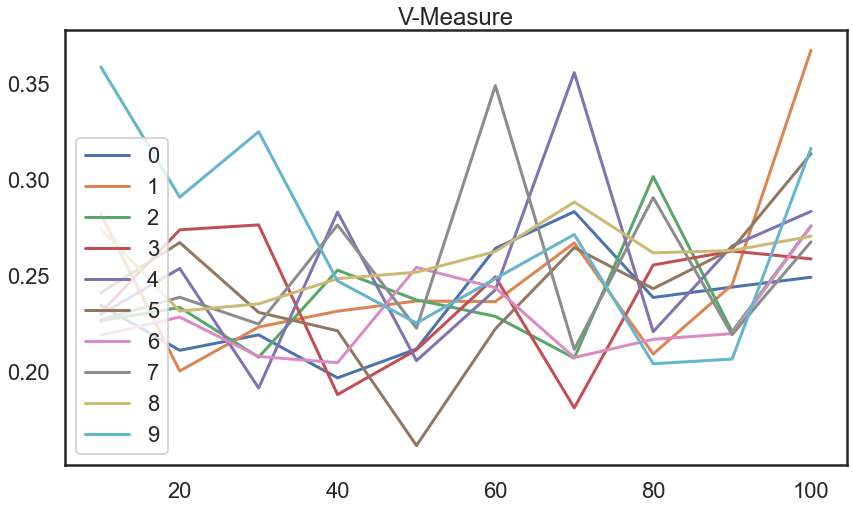

In [16]:
plot_features_performance(vms, "V-Measure")

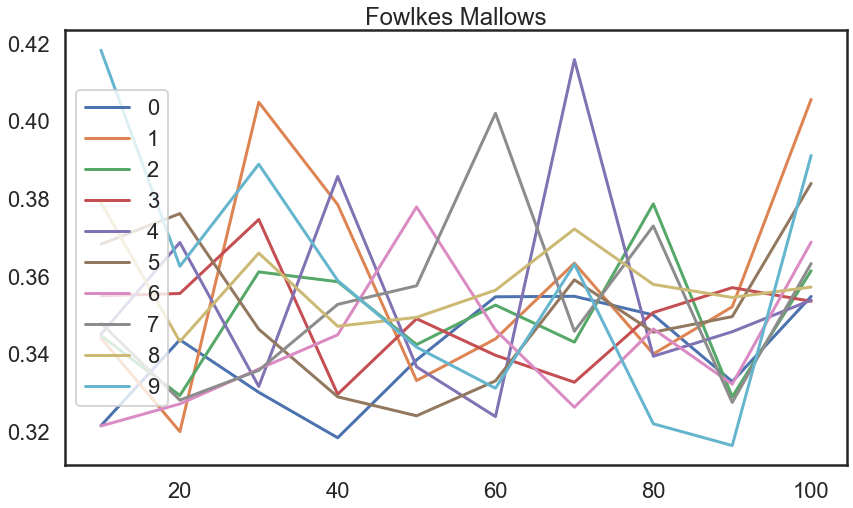

In [17]:
plot_features_performance(fms, "Fowlkes Mallows")

In [18]:
vms, fms = features_param_metrics(logs, 3)

In [19]:
header = min_df_vals[:]
header.extend(["Seed"])

tab_results(header, vms)

+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|          10         |          20         |          30         |          40         |          50         |          60         |          70         |          80         |          90         |         100         | Seed |
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|  0.1994154104768623 | 0.18827087760722727 |  0.2513999972848422 | 0.19684407861718237 |  0.2726527624720557 |  0.2788032818699196 |  0.3495442363404414 | 0.26039378674425434 |  0.3363521705071188 |  0.337462726862188  |  36  |
|  0.2636531921416508 |  0.1891702835874243 |  0.2236200017565731 |  0.2349980501985

In [20]:
tab_results(header, fms)

+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|          10         |          20         |          30         |          40         |          50         |          60         |          70         |          80         |          90         |         100         | Seed |
+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+---------------------+------+
|  0.3332728300024257 | 0.33179519190831175 |  0.3385835704175323 |  0.3153951458988077 | 0.37639112790758156 | 0.34486975660412234 |  0.4052959394314819 | 0.36489921558134314 |  0.3975515704917514 |  0.399498930007501  |  36  |
| 0.38753473119542103 |  0.328216675693246  |  0.3258334757176201 |  0.3393765159691

In [21]:
vms=np.delete(vms, -1, axis=1)
fms=np.delete(fms, -1, axis=1)
indvm, indfm = find_best_param(vms, fms)

6
6


In [22]:
indvm, indfm

(6, 6)

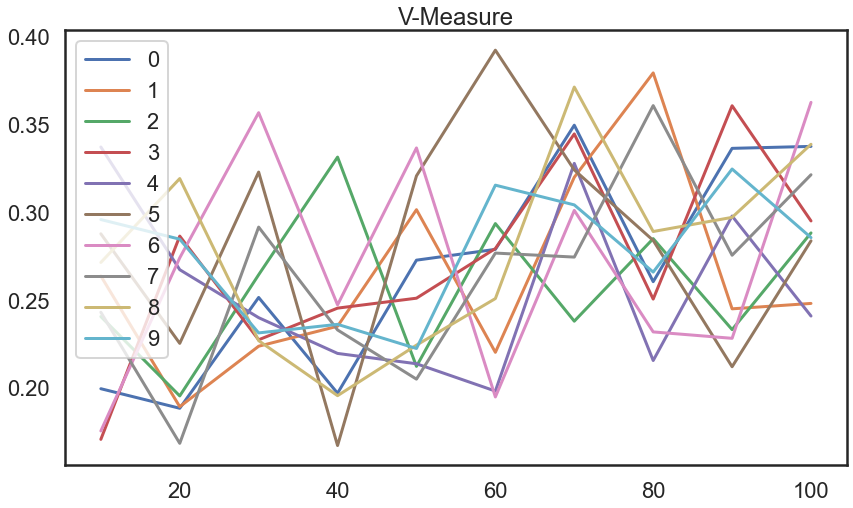

In [23]:
plot_features_performance(vms, "V-Measure")

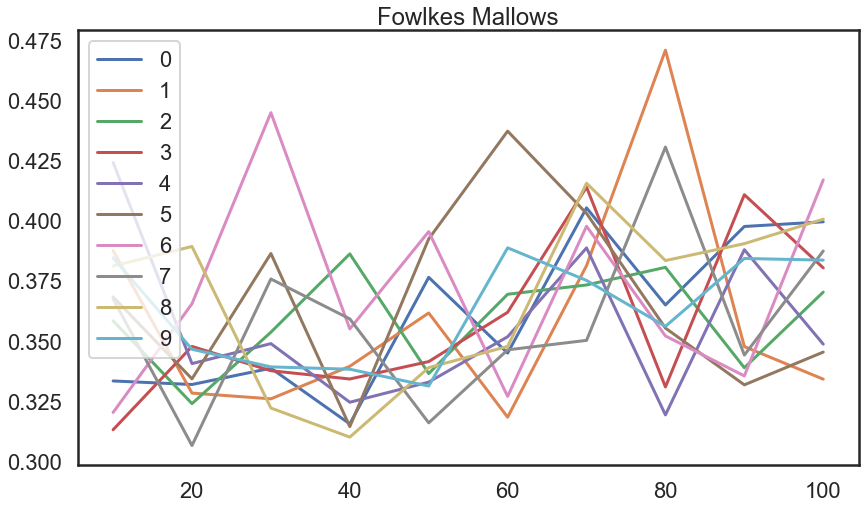

In [24]:
plot_features_performance(fms, "Fowlkes Mallows")

## Bigram Feature Vectorizer

In [25]:
eval_results = []

In [26]:
labels_ = log_labels
            
X = get_features(logs, 2, 70)
X = X.toarray()

idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [27]:
X.shape

(10689, 358)

In [28]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,random_state=0).fit(X)
labels = kmeans.labels_

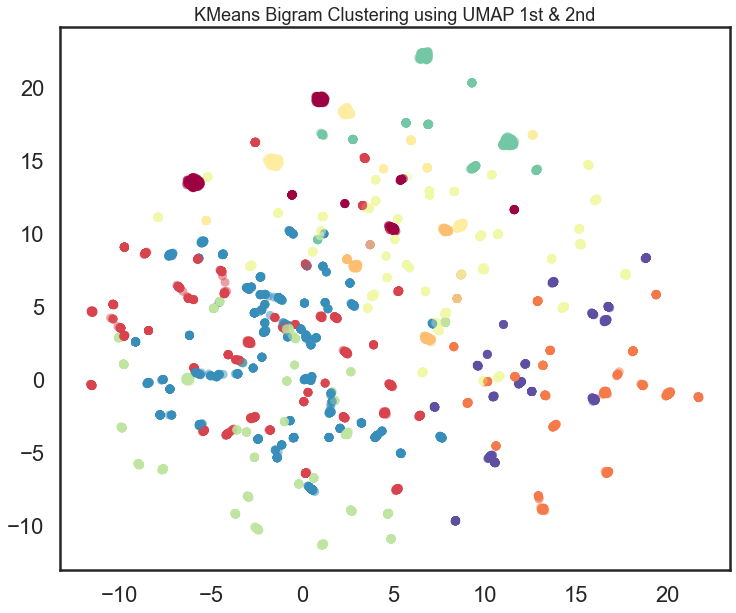

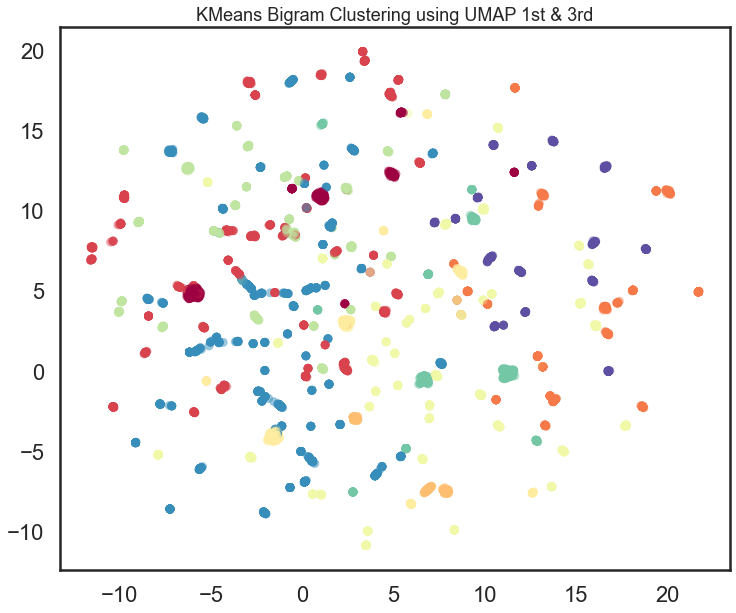

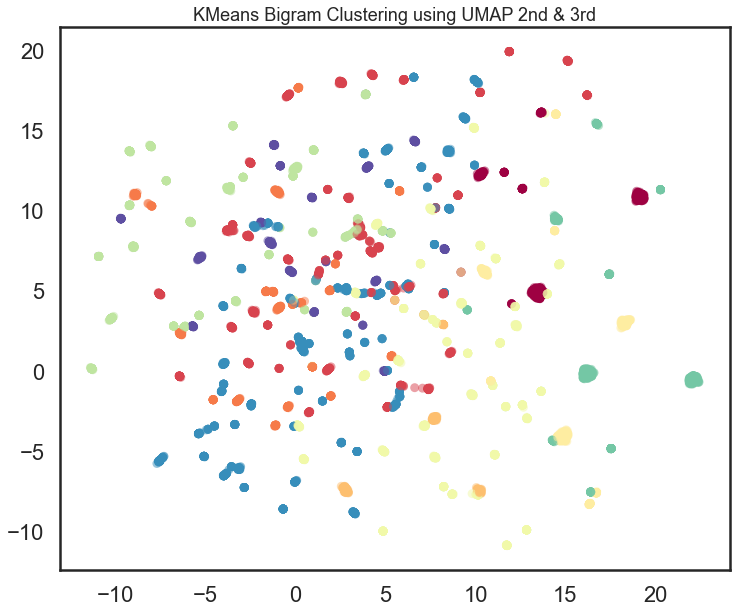

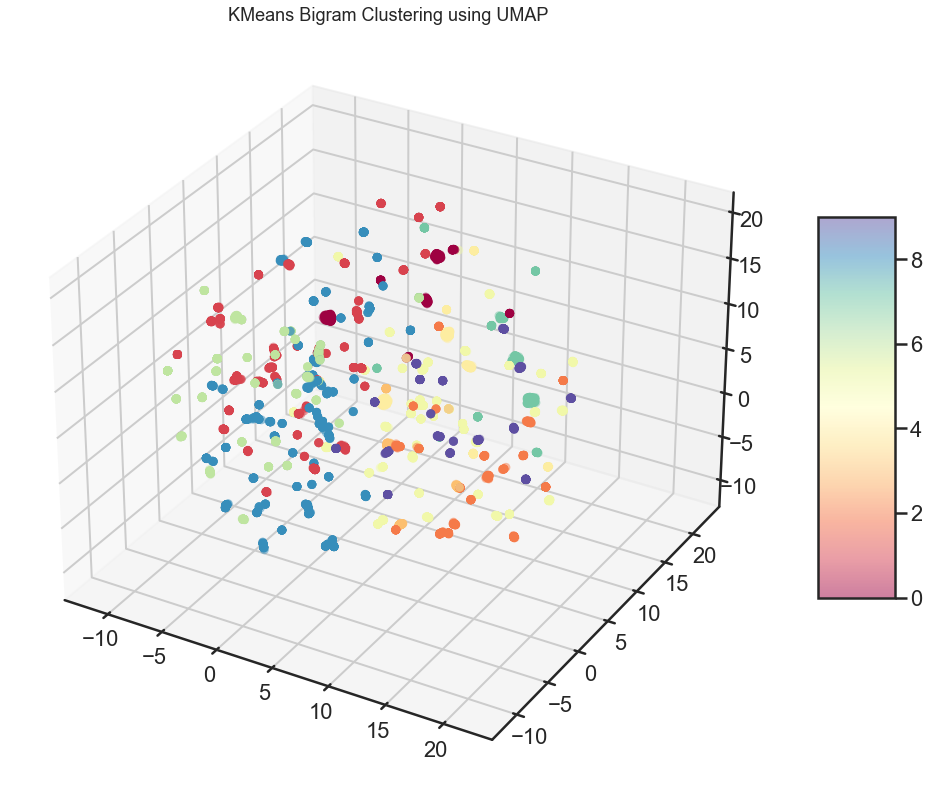

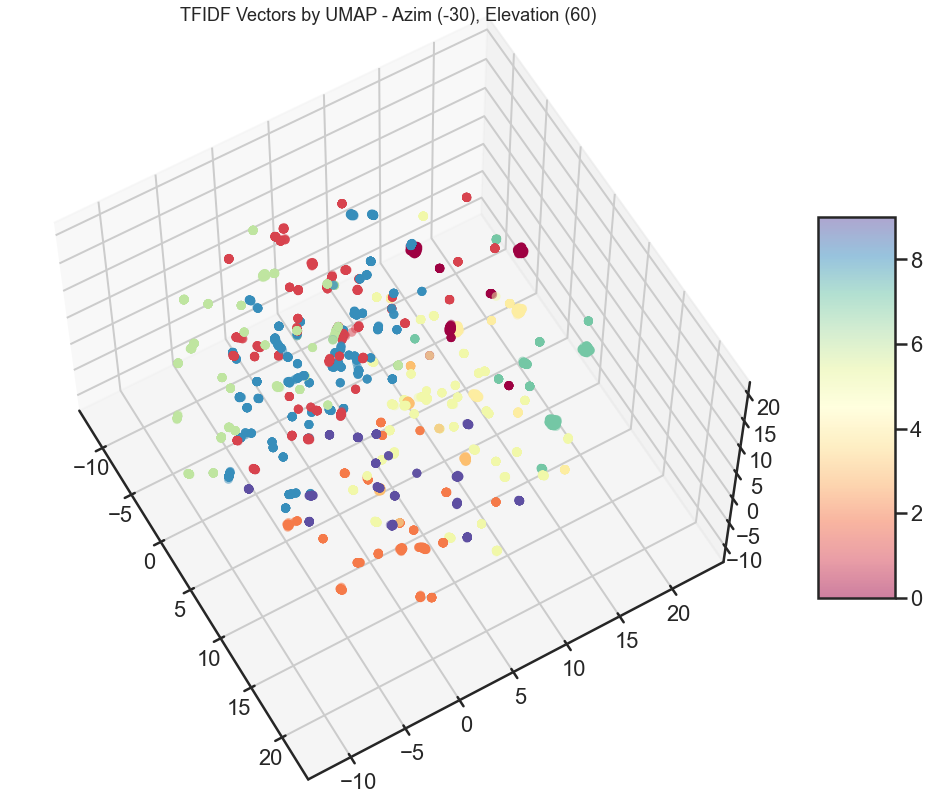

In [29]:
plot_clusters("KMeans Bigram Clustering using UMAP", X, labels)

In [30]:
results = evaluate_clustering('KMeans Bigram Clustering', X, labels_, labels)
print(results)

['KMeans Bigram Clustering', '0.78', '0.21', '0.33', '0.12', '0.33', '0.39']


In [31]:
eval_results.append(results)

## Trigram Feature Vectorizer

In [32]:
labels_ = log_labels
            
X = get_features(logs, 3, 90)
X = X.toarray()
idxs = np.where(np.all(X == 0, axis=1))

X = np.delete(X, idxs, axis=0)
labels_ = np.delete(labels_, idxs)

In [33]:
X.shape

(10640, 340)

In [34]:
kmeans = KMeans(init="k-means++", n_clusters=n_clusters,random_state=0).fit(X)
labels = kmeans.labels_

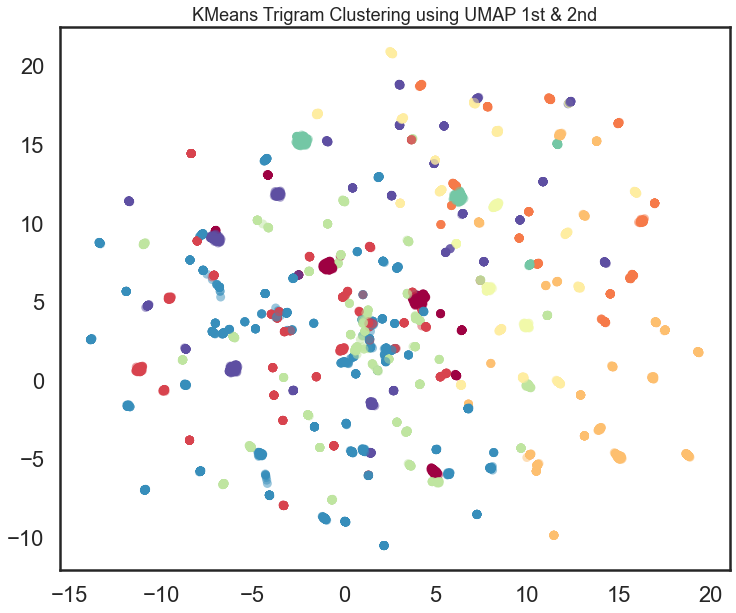

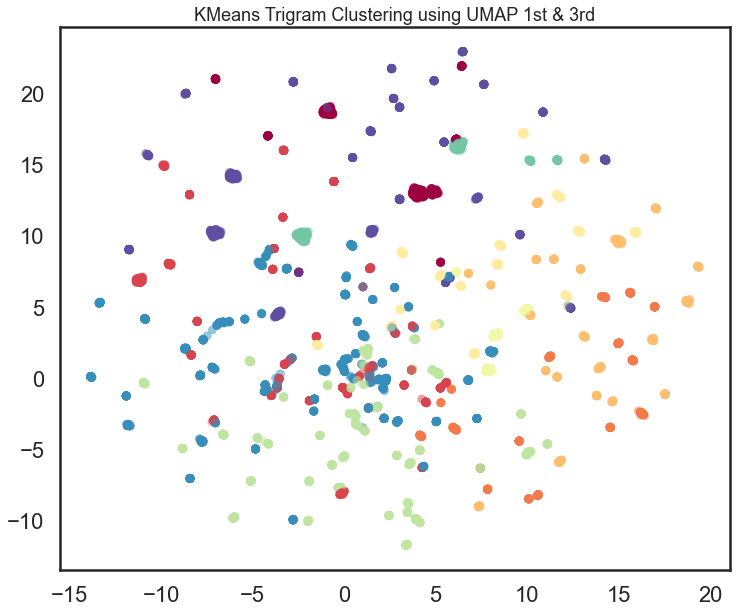

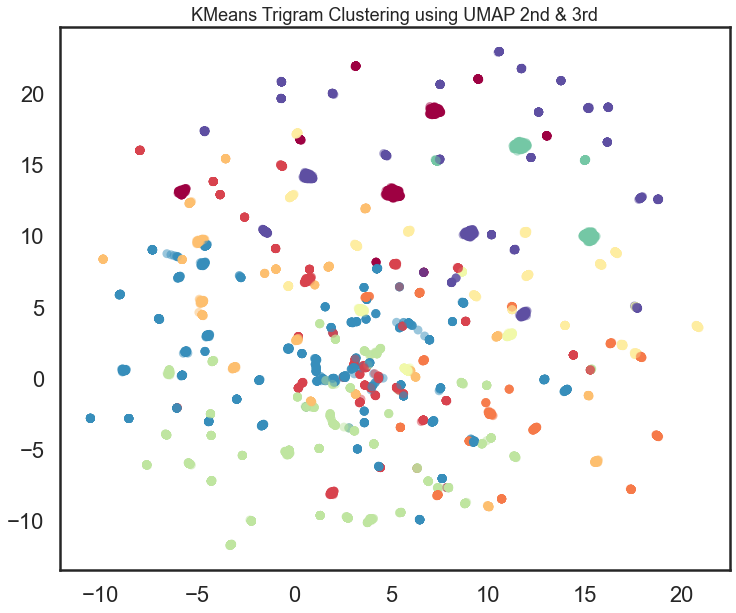

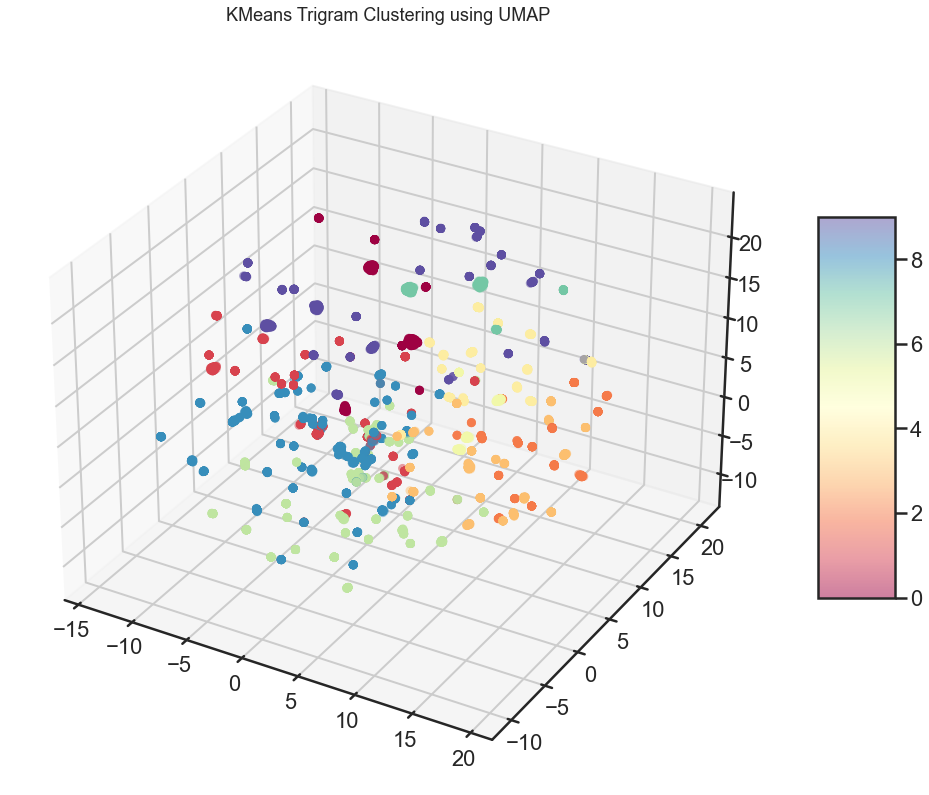

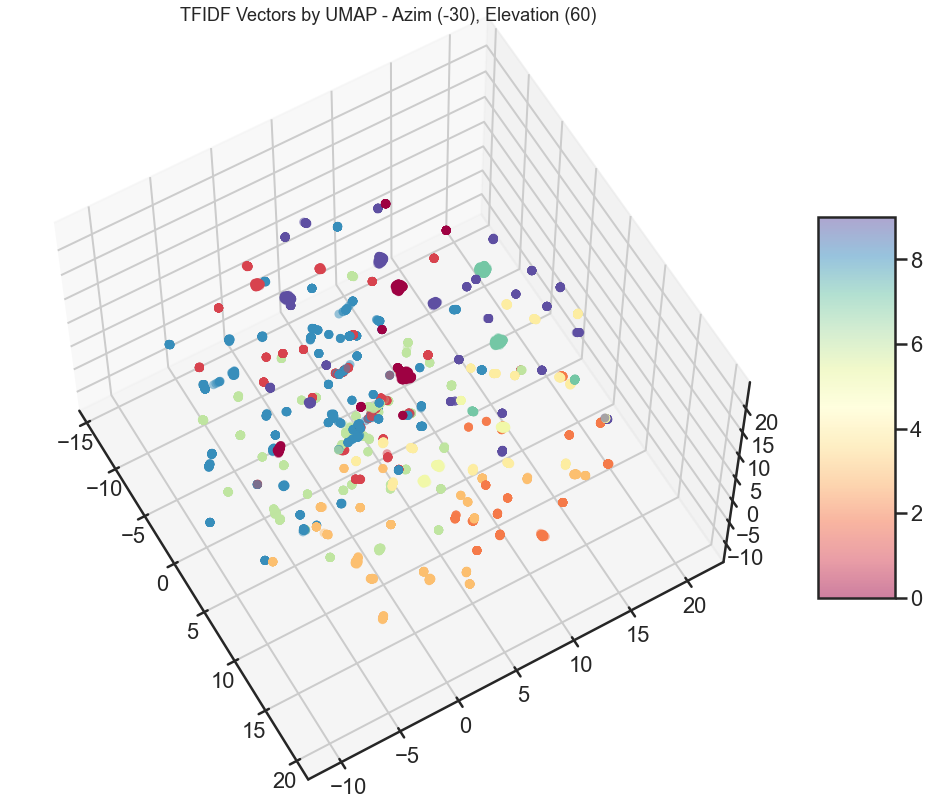

In [35]:
plot_clusters("KMeans Trigram Clustering using UMAP", X, labels)

In [36]:
results = evaluate_clustering('KMeans Trigram Clustering', X, labels_, labels)
print(results)

['KMeans Trigram Clustering', '0.59', '0.15', '0.24', '0.07', '0.24', '0.34']


In [37]:
eval_results.append(results)

In [38]:
tabulate_results(eval_results)

+---------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|            Name           | Homogeneity | Completeness | V Measure | Adj Rand Score | Norm Mutual Score | Fowlkes Mallows |
+---------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
|  KMeans Bigram Clustering |     0.78    |     0.21     |    0.33   |      0.12      |        0.33       |       0.39      |
| KMeans Trigram Clustering |     0.59    |     0.15     |    0.24   |      0.07      |        0.24       |       0.34      |
+---------------------------+-------------+--------------+-----------+----------------+-------------------+-----------------+
